In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv('FinalData/test.csv')
train = pd.read_csv('FinalData/train.csv')
sampleSubmission = pd.read_csv('FinalData/sample_submission.csv')


In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\jphil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


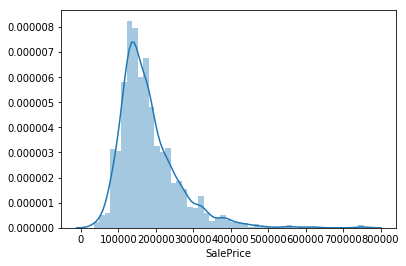

In [3]:
## Examining Sale price the dependent variable
print(train['SalePrice'].describe())
sns.distplot(train['SalePrice']);

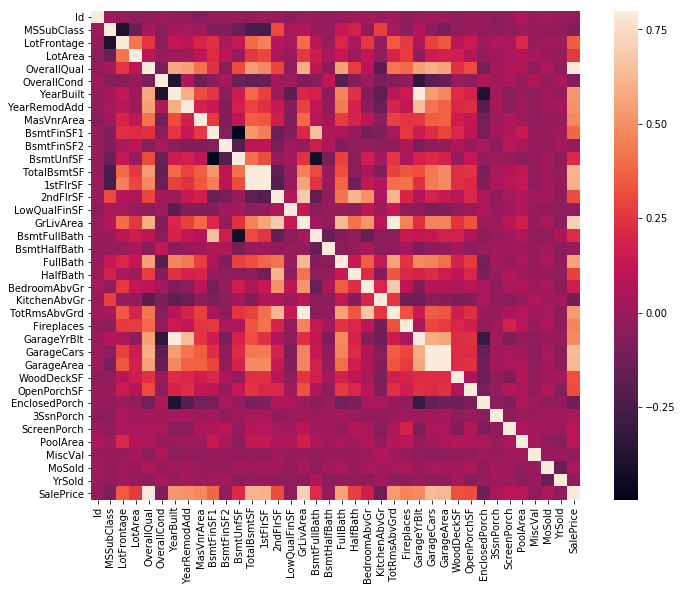

In [4]:
## My first idea to look for what factors influence sale price was a correlation matrix, looking at the sale price column (furthest right)
## it looks like the main factors are overall quality, square footage, and basement square footage

corrMatrix = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrMatrix, vmax=.8, square=True);

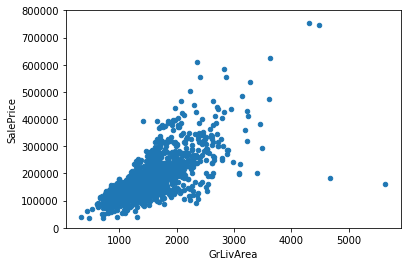

In [5]:
## Plot to show correlation between square footage (of living space) and price
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

In [21]:
## the two points way on the right that have very high square footage are clearly outliers so I'll delete those right away
train.sort_values(by = 'GrLivArea', ascending = False)[:2] ## to find the ids for these two points


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [23]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

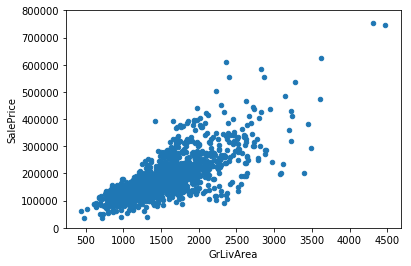

In [24]:
## New plot without outliers
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

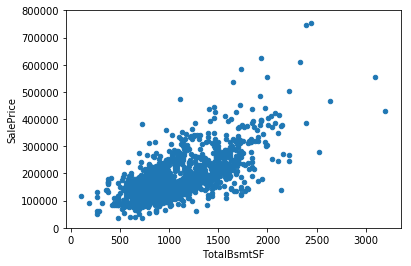

In [25]:
## Plot to show correlation between basement square footage and price
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));
## Important to note there was an outlier here, with low price and basement square footage > 5000 square feet and that was removed
## As it was one of the two outliers from above.

In [7]:
## There are way too many dimensions so I wanted to get rid of the less important ones I figured ones with mostly null values 
## Would not be helpful so I checked for nulls and dropped the mostly empty columns
totalNull = train.isnull().sum().sort_values(ascending=False)
percentNull = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalNull, percentNull], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [8]:
## I decided any columns with more than 5% of the rows null was too much so I dropped those rows. 
train = train.drop((missing_data[missing_data['Percent'] > 0.05]).index,1)

In [9]:
## Checking to see the drop worked, we went from 81 columns down to 75
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
## Rechecking the nulls to make sure everything worked, now the most null filled column only has 2% null I'll now just delete those null rows 
totalNull = train.isnull().sum().sort_values(ascending=False)
percentNull = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalNull, percentNull], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
BsmtQual,37,0.025342
MasVnrArea,8,0.005479
MasVnrType,8,0.005479
Electrical,1,0.000685
Exterior1st,0,0.000000
YearRemodAdd,0,0.000000


In [17]:
train = train.dropna(how='any',axis=0)


In [18]:
## Once again checking for Nulls
totalNull = train.isnull().sum().sort_values(ascending=False)
percentNull = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalNull, percentNull], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
SalePrice,0,0.0
ExterQual,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [30]:
train.to_csv('FinalData.csv', index=False,)  